# Step 1: Business Understanding

## Objective

Syriatel is a telecommunications company experiencing a growing concern over customer churn, which refers to the loss of clients or subscribers. The goal of this project is to build a machine learning model that accurately predicts whether a customer is likely to churn based on their behavior and service usage history.

By identifying high-risk customers early, Syriatel can implement proactive retention strategies, such as targeted offers, discounts, or personalized support.

## Problem Statement

Customer churn has a direct impact on company revenue and growth. Acquiring a new customer is often more expensive than retaining an existing one. Syriatel seeks to leverage historical customer data to develop a predictive model that classifies customers into two categories:

- **Churn = True**: Customers who are likely to leave the service.
- **Churn = False**: Customers who are expected to stay.

## Goals

- Understand the factors that contribute to customer churn.
- Build a reliable classification model using historical customer data.
- Provide actionable insights and recommendations to reduce churn rates.
- Deploy the model in a way that integrates with Syriatel’s customer relationship management (CRM) systems for real-time retention action.

## Success Criteria

- A trained model with acceptable classification performance (e.g., accuracy, precision, recall).
- A clean, reproducible notebook that explains each step clearly.
- Data preprocessed using pipelines to prevent leakage and ensure future scalability.
- A summary of the top churn indicators to assist business teams in retention strategy.


# Step 2: Data Understanding

Understanding the structure, quality, and content of the data is essential before building any predictive model. This step involves reviewing the dataset's shape, data types, missing values, and summary statistics. The insights gathered here will inform decisions during data preparation and feature engineering.

### Dataset Overview

The dataset contains historical records of Syriatel customers, including usage patterns, service subscriptions, and whether or not the customer has churned (target variable: `Churn`).

### Key Tasks:
- Load the dataset and examine its structure.
- Check for missing values and inconsistent data types.
- Identify categorical vs numerical features.
- Analyze class balance for the target variable (`Churn`).


### 1. Load the dataset and inspect structure


In [57]:
import pandas as pd

# Load dataset
file_path = "../data/bigml_59c28831336c6604c800002a.csv"
df = pd.read_csv(file_path)

# Show shape and column names
print("Dataset shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())


Dataset shape: (3333, 21)

Columns:
['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


 ### 2. Inspect data types and missing values

In [58]:
# Show info and check for null values
df.info()
print("\nMissing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### 3. Class distribution of target variable

In [59]:
# Target variable distribution
print("churn class distribution:")
print(df['churn'].value_counts(normalize=True))


churn class distribution:
False    0.855086
True     0.144914
Name: churn, dtype: float64


### 4. Show first few records

In [60]:
# Preview first 5 records
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 5. Describe numeric features

In [61]:
# Summary statistics for numerical columns
df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### 6. Check for duplicate rows



In [62]:
# Check for duplicates
print("Duplicate records:", df.duplicated().sum())


Duplicate records: 0


# Findings

## Dataset Structure

The dataset consists of 3,333 customer records and 21 columns. Each row represents a single customer, and the columns contain attributes such as usage metrics, service plan subscriptions, and the target variable `churn`.

- **Rows (observations):** 3,333  
- **Columns (features):** 21  
- **Target variable:** `churn` (Boolean, where `True` indicates the customer churned)

## Data Quality

- No missing values are present in any column.
- All data types are appropriate and consistent (e.g., numerical features are floats or integers, categorical features are strings).
- There are no duplicate rows in the dataset.

## Class Distribution

- The target variable `churn` is imbalanced:
  - `False` (no churn): 85.5% of customers
  - `True` (churn): 14.5% of customers

This imbalance suggests that accuracy alone is not a suitable performance metric. Evaluation will require additional focus on precision, recall, or F1-score.

## Feature Types

- **Categorical features:** `state`, `area code`, `phone number`, `international plan`, `voice mail plan`
- **Numerical features:** Remaining columns such as `account length`, `total day minutes`, `total eve calls`, `customer service calls`, etc.

Note: `phone number` is a unique identifier and does not contribute meaningfully to prediction; it should be dropped during data preparation.

## Statistical Summary

- Features such as `total day minutes`, `total eve minutes`, and `total night minutes` have a wide range of values and may require scaling.
- Many customers have `0` voice mail messages, suggesting that the `voice mail plan` is not widely used.
- The `customer service calls` feature ranges from 0 to 9, which may capture customer dissatisfaction and could be an important predictor of churn.

## Preliminary Insights

- The dataset is clean, well-structured, and ready for detailed data preparation.
- Some columns (e.g., `phone number`) may need to be excluded.
- The imbalance in the target variable will need to be addressed during model training through appropriate techniques such as stratified splitting or class weighting.



# Step 3 : Data Preparation
This step focuses on preparing the features and target variable for machine learning, while strictly avoiding data leakage.

### 3.1: Drop irrelevant columns

In [63]:
# Drop the phone number column as it has no predictive value
df.drop(columns=['phone number'], inplace=True)


### 3.2: Encode target variable

In [64]:
# Convert churn from boolean to binary integer
df['churn'] = df['churn'].astype(int)


### Step 3.3: Identify feature types

In [70]:
# Define categorical and numerical features
categorical_features = ['state','area_code', 'international_plan', 'voice_mail_plan']
numerical_features = df.drop(columns=categorical_features + ['churn']).columns.tolist()
print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)


Categorical features: ['state', 'area_code', 'international_plan', 'voice_mail_plan']
Numerical features: ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']


### 3.4 Rename Columns 

We standardize column names by replacing spaces with underscores.


In [67]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns


Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

### 3.5 Backup Final Cleaned DataFrame


In [ ]:
clean_df = df.copy()


In [ ]:
print(clean_df.shape)
print(clean_df.columns)


(3333, 20)
Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')


# STEP 4: EXPLORATORY DATA ANALYSIS
Exploratory Data Analysis (EDA) is a critical step that helps us understand the structure, quality, and relationships within the data. By visualizing and summarizing the features, we can identify key patterns, trends, anomalies, and potential signals that may influence customer churn.

This section includes:

- Analyzing the distribution of the target variable churn

- Understanding the spread and behavior of numerical and categorical features

- Investigating how features relate to churn

- Identifying correlations and multicollinearity

- Highlighting insights to inform feature selection and model development

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### 4.1 Target Variable Distribution

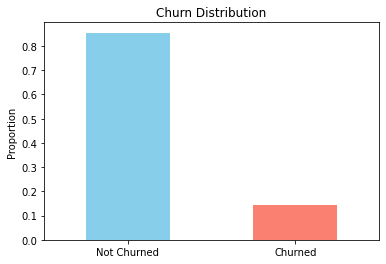

In [ ]:
# Target variable distribution
churn_counts = df['churn'].value_counts(normalize=True)
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.xticks([0, 1], ['Not Churned', 'Churned'], rotation=0)
plt.ylabel('Proportion')
plt.show()


The bar chart above displays the distribution of churned vs. non-churned customers in the dataset.

- The blue bar represents non-churned customers (0).
- The red bar represents churned customers (1).

 **Observations**
- The dataset is highly imbalanced, with significantly more non-churned customers.

- This imbalance could affect model performance, especially in metrics like accuracy.


### 4.2 Numerical Feature Distributions

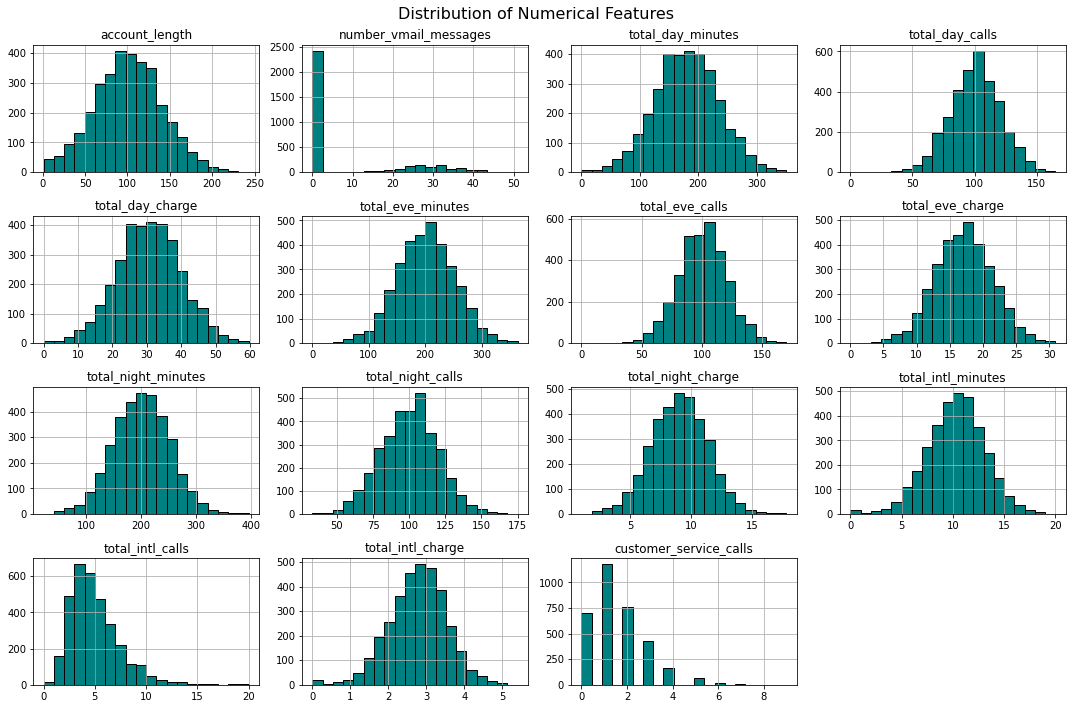

In [71]:
# Histograms for numerical features
df[numerical_features].hist(figsize=(15, 10), bins=20, color='teal', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


### 4.3 Categorical Feature Distributions

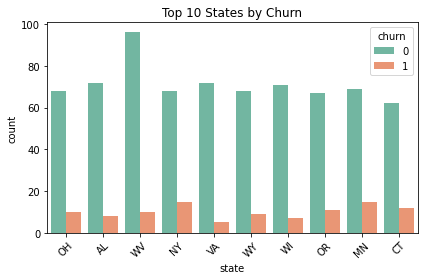

In [75]:
top_states = clean_df['state'].value_counts().nlargest(10).index
sns.countplot(data=clean_df[clean_df['state'].isin(top_states)], x='state', hue='churn', palette='Set2')
plt.title('Top 10 States by Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


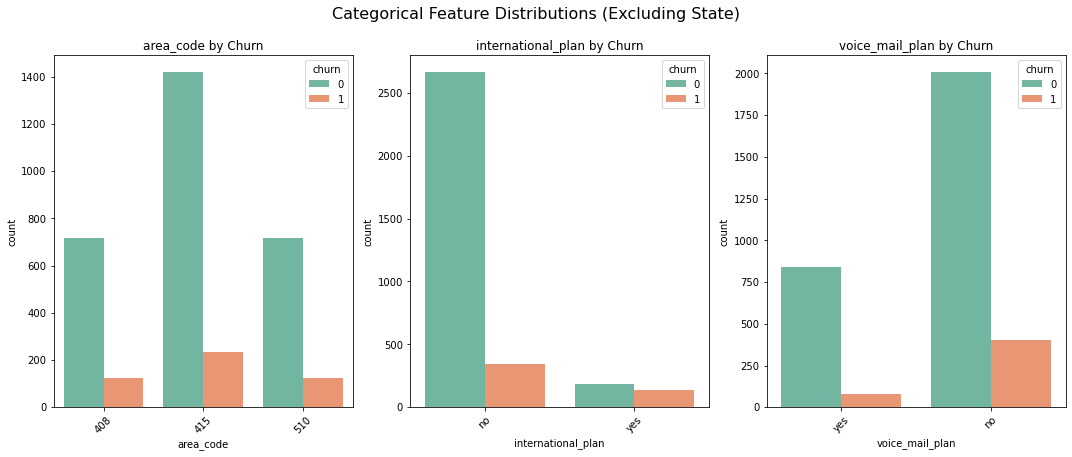

In [76]:
# List of categorical features
categorical_features = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

# Remove 'state'
cat_features_to_plot = [col for col in categorical_features if col != 'state']

# Plot each in a separate subplot
plt.figure(figsize=(15, 6))
for i, col in enumerate(cat_features_to_plot):
    plt.subplot(1, len(cat_features_to_plot), i + 1)
    sns.countplot(data=clean_df, x=col, hue='churn', palette='Set2')
    plt.title(f'{col} by Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle('Categorical Feature Distributions (Excluding State)', fontsize=16, y=1.05)
plt.show()



### 4.4 Churn Rate by Categorical Features

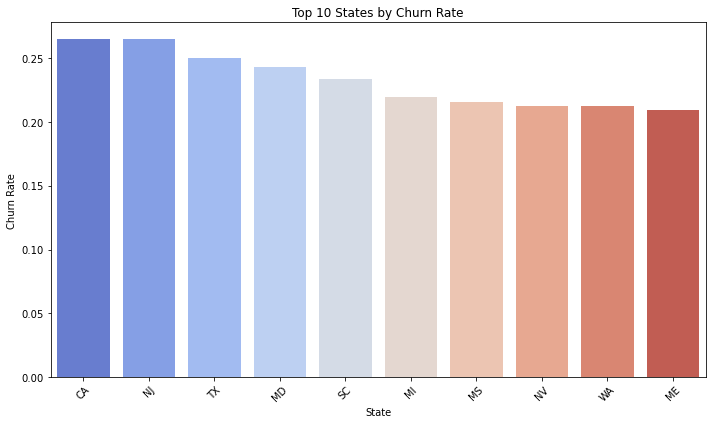

In [77]:
# Calculate churn rate by state
state_churn_rate = clean_df.groupby('state')['churn'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=state_churn_rate.index, y=state_churn_rate.values, palette='coolwarm')
plt.title('Top 10 States by Churn Rate')
plt.ylabel('Churn Rate')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


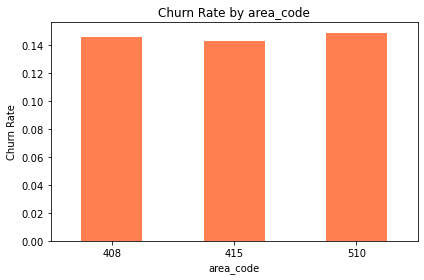

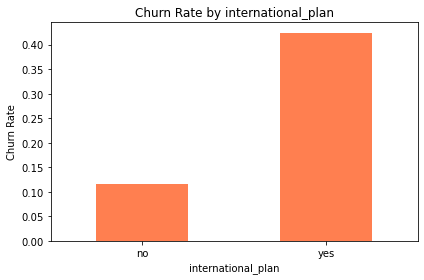

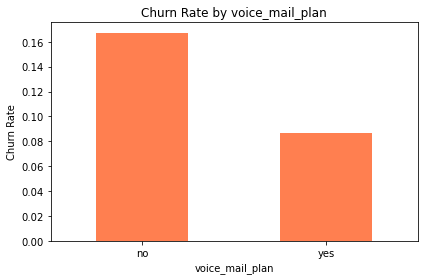

In [78]:
# Bar plots of churn rate by categorical variables
# Exclude 'state' from categorical features
plot_features = [col for col in categorical_features if col != 'state']

# Plot churn rate for each categorical feature (excluding 'state')
for col in plot_features:
    churn_rate = clean_df.groupby(col)['churn'].mean()
    churn_rate.plot(kind='bar', color='coral')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()



### 4.5 Correlation Matrix for Numerical Features

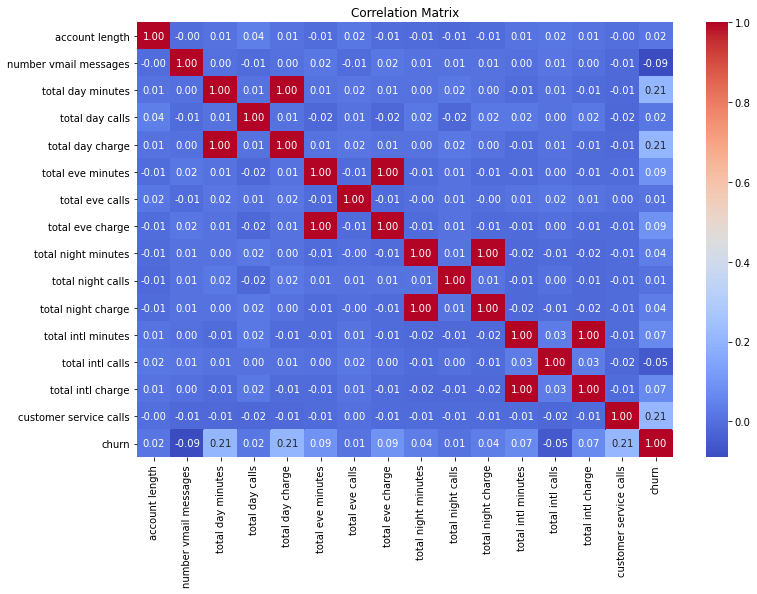

In [ ]:
# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features + ['churn']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Step 4.6: Box Plots for Numerical Features by Churn

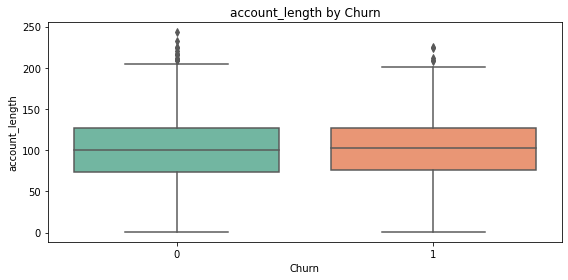

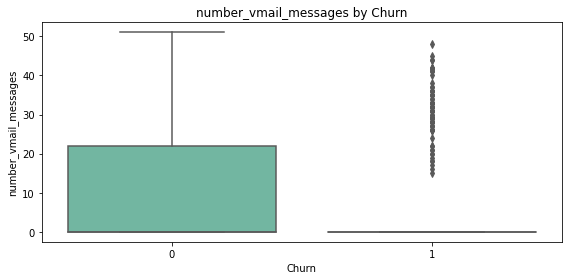

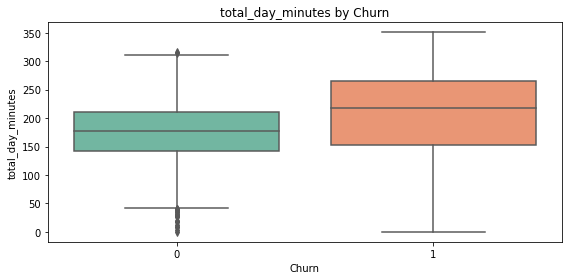

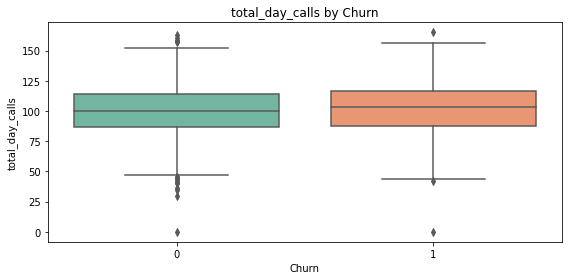

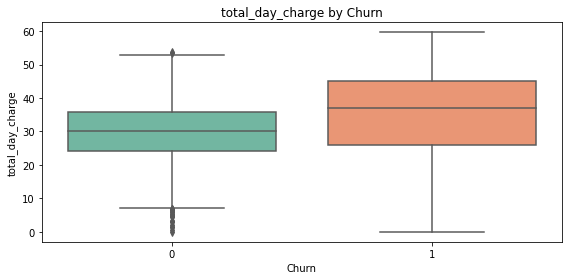

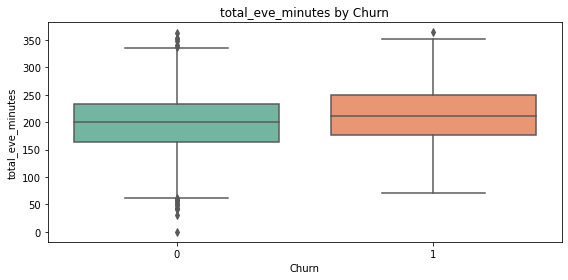

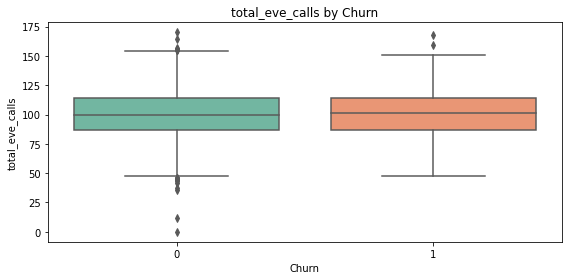

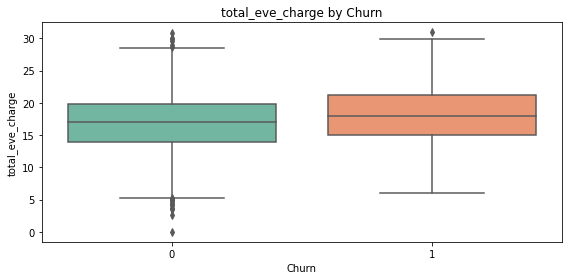

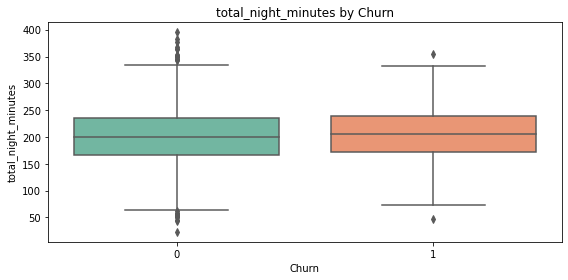

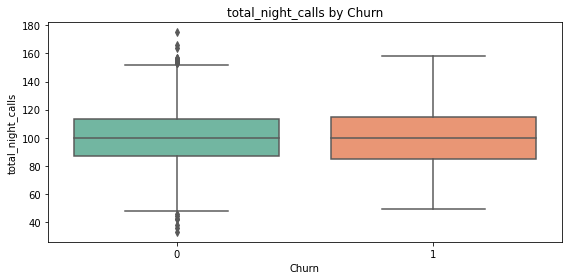

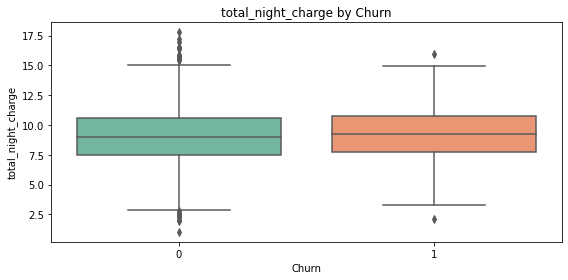

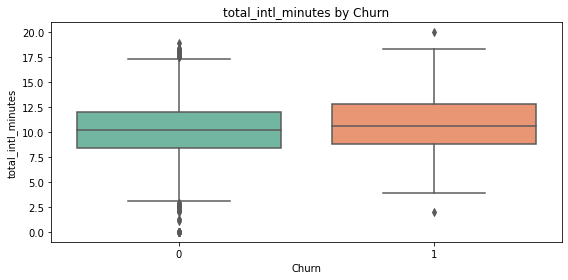

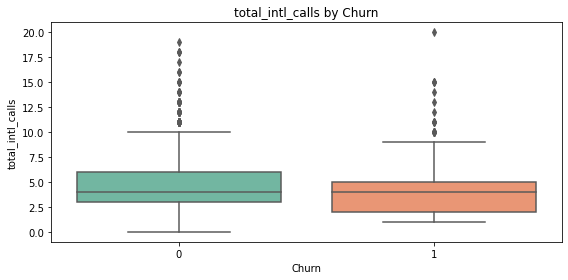

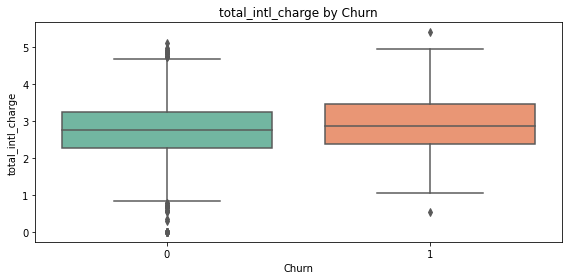

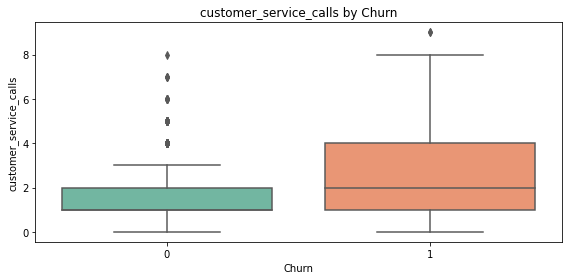

In [80]:
# Box plots for numerical features grouped by churn
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='churn', y=col, data=clean_df, palette='Set2')
    plt.title(f'{col} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


# Step 5: Statistical Analysis
Objective:
To analyze feature distributions, detect potential data issues (e.g. outliers, skewness), and examine how features differ across churned vs. non-churned customers. This helps identify statistically significant variables for model building.

### 5.1 Descriptive Statistics Overview
This gives a transposed summary of numerical features.

Helps identify features with high variability, skewness, or outliers.

In [ ]:
# 5.1 Descriptive statistics
X_train.describe().T.sort_values(by="std", ascending=False)


,count,mean,std,min,25%,50%,75%,max
total_minutes,2666.0,591.145986,89.209071,284.30000,530.150000,592.950000,650.250000,882.200000
total day minutes,2666.0,179.705851,54.348985,0.00000,143.425000,179.300000,216.200000,350.800000
total eve minutes,2666.0,200.682071,50.489087,0.00000,165.800000,201.150000,233.575000,363.700000
total night minutes,2666.0,200.513391,49.956525,23.20000,166.700000,200.850000,234.500000,395.000000
area code,2666.0,436.529632,41.993997,408.00000,408.000000,415.000000,415.000000,510.000000
account length,2666.0,100.987997,39.868535,1.00000,74.000000,101.000000,127.000000,243.000000
total_calls,2666.0,304.915604,34.320944,191.00000,282.000000,305.000000,327.000000,408.000000
total day calls,2666.0,100.485746,20.012791,0.00000,87.000000,101.000000,114.000000,165.000000
total eve calls,2666.0,100.093023,20.001341,0.00000,87.000000,100.000000,114.000000,170.000000
total night calls,2666.0,99.831958,19.584241,33.00000,86.000000,100.000000,113.000000,175.000000


### 5.2 Compare Feature Means by Churn Status

In [ ]:
# 5.2 Mean comparison of numerical features by churn status
X_train_num = X_train.select_dtypes(include=["int64", "float64", "bool"])
churn_grouped = pd.concat([X_train_num, y_train], axis=1).groupby("churn").mean().T
churn_grouped["diff"] = churn_grouped[1] - churn_grouped[0]
churn_grouped.sort_values("diff", ascending=False)


churn,0,1,diff
total_minutes,584.473158,630.560622,46.087464
total day minutes,175.436579,204.923316,29.486737
total eve minutes,198.797544,211.813472,13.015928
total_charge,58.471298,64.875492,6.404194
total day charge,29.824759,34.837591,5.012832
total night minutes,200.073860,203.109585,3.035726
account length,100.663158,102.906736,2.243578
total_calls,304.602193,306.766839,2.164646
total day calls,100.295614,101.608808,1.313194
total eve charge,16.898039,18.004352,1.106313


### 5.3 Correlation Matrix
Reveals linear relationships and potential multicollinearity.

Useful for feature selection and reducing redundancy.


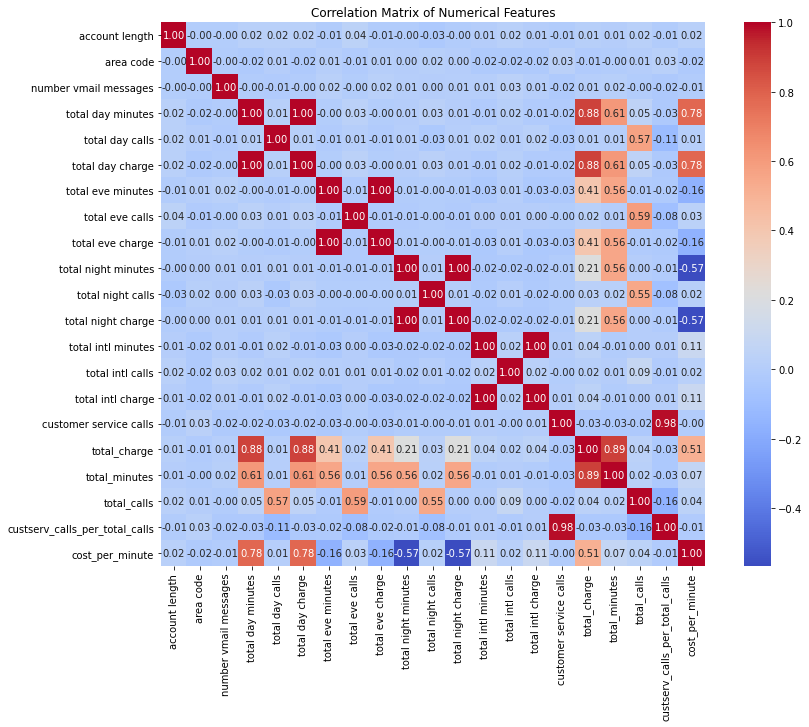

In [ ]:

# 5.3 Correlation matrix for numerical variables
plt.figure(figsize=(14, 10))
sns.heatmap(X_train_num.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


 ### 5.4 Skewness and Kurtosis

In [ ]:
# 5.4 Skewness and Kurtosis
from scipy.stats import skew, kurtosis

stats_df = pd.DataFrame({
    "Skewness": X_train_num.apply(skew),
    "Kurtosis": X_train_num.apply(kurtosis)
})

stats_df.sort_values(by="Skewness", key=lambda x: abs(x), ascending=False)


,Skewness,Kurtosis
number vmail messages,1.274777,-0.030220
total intl calls,1.231573,2.682350
area code,1.167308,-0.611213
custserv_calls_per_total_calls,1.054317,1.296266
customer service calls,0.988217,1.167403
total intl charge,-0.199050,0.602694
total intl minutes,-0.198944,0.602352
account length,0.088176,-0.101017
total day calls,-0.087061,0.194458
total eve calls,-0.072322,0.268839


### 5.5 Hypothesis Testing: t-tests between churn groups

In [ ]:
from scipy.stats import ttest_ind

# 5.5 T-tests: significant difference between churned and non-churned
ttest_results = {}
for col in X_train_num.columns:
    churned = X_train[y_train == 1][col]
    non_churned = X_train[y_train == 0][col]
    t_stat, p_val = ttest_ind(churned, non_churned, equal_var=False)
    ttest_results[col] = p_val

ttest_df = pd.DataFrame(ttest_results.items(), columns=["Feature", "p-value"])
ttest_df["Significant"] = ttest_df["p-value"] < 0.05
ttest_df.sort_values(by="p-value")


,Feature,p-value,Significant
15,customer service calls,1.277692e-17,True
19,custserv_calls_per_total_calls,1.008660e-16,True
16,total_charge,1.068407e-16,True
5,total day charge,3.153574e-14,True
3,total day minutes,3.155101e-14,True
17,total_minutes,5.662328e-14,True
2,number vmail messages,1.368172e-07,True
20,cost_per_minute,2.066883e-06,True
8,total eve charge,5.313227e-06,True
6,total eve minutes,5.316349e-06,True


 ### 5.6 ANOVA Test (Numerical vs. Target)
Test whether the mean of numerical features differs significantly across churn groups.
ANOVA (Analysis of Variance) tests whether group means are significantly different.

p-value < 0.05 means that the feature differs significantly across churn groups.

In [ ]:
from scipy.stats import f_oneway

anova_results = {}

for col in X_train_num.columns:
    churned = X_train[y_train == 1][col]
    non_churned = X_train[y_train == 0][col]
    f_stat, p_val = f_oneway(churned, non_churned)
    anova_results[col] = p_val

anova_df = pd.DataFrame(anova_results.items(), columns=["Feature", "p-value"])
anova_df["Significant"] = anova_df["p-value"] < 0.05
anova_df.sort_values("p-value")


,Feature,p-value,Significant
15,customer service calls,1.625188e-33,True
19,custserv_calls_per_total_calls,1.745013e-31,True
16,total_charge,1.550824e-29,True
5,total day charge,2.611540e-23,True
3,total day minutes,2.615620e-23,True
17,total_minutes,2.996198e-21,True
20,cost_per_minute,1.118350e-06,True
2,number vmail messages,1.799293e-06,True
6,total eve minutes,2.701862e-06,True
8,total eve charge,2.703575e-06,True


 ### 5.7 Chi-Square Test (Categorical vs. Target)
 Test whether categorical features like intl plan or area code are associated with churn.

In [ ]:
from scipy.stats import chi2_contingency

categorical_cols = ['area code', 'international plan', 'voice mail plan']
chi2_results = {}

for col in categorical_cols:
    contingency = pd.crosstab(X_train[col], y_train)
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi2_results[col] = p

chi2_df = pd.DataFrame(chi2_results.items(), columns=["Feature", "p-value"])
chi2_df["Significant"] = chi2_df["p-value"] < 0.05
chi2_df.sort_values("p-value")


,Feature,p-value,Significant
1,international plan,1.060485e-37,True
2,voice mail plan,4.114757e-08,True
0,area code,7.559311e-01,False
